In [1]:
pip install emoji

# Loading And Preprocessing Text Data

In [2]:
import re
import emoji

In [3]:
import pandas as pd
import numpy as np
import torch

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
counter=0
tweets=[]
id=[]
y=[]
z=[]
words=[]
max_length=50
with open('/content/drive/My Drive/hinglish_data/train_14k_split_conll.txt','r') as file: 
  for line in file: 
    if len(line.split())==3:
      id.append(line.split()[1])
      y.append(line.split()[2])
      tweets.append(z)
      z=[]
    elif len(line.split())==2:
      z.append(line.split()[0])  
      words.append(line.split()[0])
    # if counter>=150:
    #   break  
    for word in line.split(): 
      #print(word)
      a=1
      #counter+=1
tweets.append(z)
tweets.pop(0)    

[]

In [6]:
tweets2=[]
count=1
for sent in tweets:
  i=0
  z=[]
  while i<len(sent):
    #print(sent[i])
    if(sent[i]=='https'):
      z.append("")
      i+=6
    elif(sent[i]=='@'):
      z.append("")
      i+=1
    elif sent[i]=='...' or sent[i]=='..' or sent[i]=='....' or sent[i]=='…':
      z.append('.')
    elif not sent[i]=='_':
      z.append(sent[i])  
    i+=1
    count+=1
    #print(z) 
  tweets2.append(z)   
    #if(count>=300):
    #  break;

In [7]:
temp2=[(" ").join(i for i in tweets2[j]) for j in range(0,14000)]
print(temp2[:5])
def deSymbolify(text):
    regrex_pattern = re.compile(pattern = "["
        # u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def clean_text(text):
    text = text.lower()
    text = emoji.demojize(text)
    SMILEYS = {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }
    text = text.replace('\x92',"'")

    words = text.split()
    reformed = [SMILEYS[word] if word in SMILEYS else word for word in words]
    text = " ".join(reformed)
    text = text.replace(":"," ")
    text = ' '.join(text.split())


    
    return text




temp3=[]
for i in temp2:
  cleanstring=(clean_text(i))
  cleanstring=deSymbolify(cleanstring)
  temp3.append(cleanstring)


['nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid Asi takhle vypad á m ů j life .', ' Haan yaar neha 😔😔 kab karega woh post 😭 Usne na sach mein photoshoot karna chahiye phir woh post karega . ', ' television media congress ke liye nhi h . Ye toh aapko pata chal hi gya hoga . Achha hoga ki Congress ke . ', '  All India me nrc lagu kare w Kashmir se dhara 370ko khatam kare ham Indian ko apse yahi umid hai', ' who   Pagal hai kya ? They aren ’ t real issues Mandir is important Hindu khatre mei jo hai !']


In [8]:
c=0
for i in temp3:
  li=i.split(" ")
  indexes=set()
  for index in range(len(li)-1):
    if(li[index]=='user'):
      indexes.add(index)
      
  answer=[]
  for index in range(len(li)):
    if(index not in indexes):
      answer.append(li[index])
      
  
  temp3[c]=" ".join(answer)
 
  c=c+1

In [9]:
df=pd.DataFrame()
df['tweets']=temp3
df['sentiment']=y
df['sentiment'].replace(['neutral','positive','negative'],[0,1,2],inplace=True)

In [10]:
counter=0;zz=[];id=[];y=[];z=[]

with open('/content/drive/My Drive/hinglish_data/Hindi_test_unalbelled_conll_updated.txt','r',encoding='UTF') as file: 
  for line in file: 
    if len(line.split())==2:
      if line.split()[0]=='meta':
        zz.append(z)
        id.append(line.split()[1])
        z=[]
      else:
        z.append(line.split()[0])
zz.append(z)
zz.pop(0)
twee=[(" ").join(i for i in zz[j]) for j in range(0,len(zz))]

In [11]:
test_tweets=[]
for i in twee:
  test_tweets.append(clean_text(deSymbolify((i))))

In [12]:
testlabels=pd.read_csv('/content/drive/My Drive/hinglish_data/testlabels.csv')

In [13]:
testlabels['Sentiment'].replace(['neutral','positive','negative'],[0,1,2],inplace=True)

# Multi Layer Neural Network

In [14]:
import numpy as np
from matplotlib import pyplot
import numpy
import keras
from keras import regularizers,layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [15]:
y_train = np.array(df['sentiment'])
X_train=np.array(df['tweets'])
X_test=test_tweets
y_test=np.array(testlabels['Sentiment'])

In [16]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [17]:
print(X.shape)
print(X_train.shape)
print(len(np.unique(y)))
print(len(np.unique(X)))
v=[]
for i in X:
  for j in i:
    if j not in v:
      v.append(j)
print(v)

(17000,)
(14000,)
3
16853
['n', 'e', ' ', 'á', 'v', 'i', 's', 't', 'b', 'o', 'l', 'z', 'k', 'm', 'u', 'a', 'ě', 'd', 'j', 'c', 'h', 'y', 'p', 'ů', 'f', '.', 'r', '_', 'g', 'w', '3', '7', '0', '?', '’', '!', '-', '#', 'x', 'q', "'", '…', '~', '1', '%', '*', '4', ')', '2', '5', '+', '–', '&', '9', '•', '(', '@', 'T', 'O', 'P', '╭', '╮', '〣', 'º', 'δ', '6', '"', '/', '8', 'K', '‘', '“', '”', '>', 'म', 'े', 'र', 'च', '्', 'प', 'ा', 'ण', 'क', 'श', '£', '€', '$', 'न', 'ि', 'ध', 'य', 'ो', 'ज', '—', '★', '{', '}', 'మ', 'న', 'క', 'ి', 'ద', '్', 'ధ', 'త', 'ు', 'ర', 'ా', 'బ', 'ో', 'య', 'ే', 'ఇ', 'స', 'అ', 'ల', 'ఉ', 'ం', 'డ', 'ప', 'ష', 'ూ', 'వ', 'చ', 'त', 'ल', 'ं', 'द', 'व', 'ष', 'भ', 'ạ', 'ẽ', 'ê', 'é', 'ह', 'ै', 'स', 'ू', 'ी', 'थ', 'I', 'μ', '[', ']', 'เ', 'พ', 'ล', 'ง', 'ม', 'ี', 'แ', '้', 'ว', 'บ', 'น', 'ต', 'ฟ', 'อ', 'ร', '์', 'ส', 'ิ', '่', 'ท', 'ั', 'ห', 'ด', 'ค', 'ะ', 'ु', '¥', 'ü', 'ｓ', 'ｕ', 'ｎ', 'ｅ', 'ｔ', '=', ';', 'ौ', '|', '<', 'ج', 'م', 'ع', 'ة', 'ا', 'ل', 'و', 'د', 'ğ', 'ç', 'ı', '̇'

In [18]:
cnt=0
dc=dict()
for i in X:
  l=i.split(" ")
  for k in l:
    if (k!=" " and k not in dc.keys()):
      dc[k]=1
    else:
      dc[k]=dc[k]+1
l=[]

cnt=0
word_to_id=dict()
for i in X:
  l=i.split(" ")
  for k in l:
    if (k!=" " and k not in word_to_id.keys() and dc[k]>5):
      word_to_id[k]=cnt
      cnt=cnt+1

In [19]:
print(word_to_id)

{'á': 0, 'lost': 1, 'j': 2, 'a': 3, 'asi': 4, 'm': 5, 'life': 6, '.': 7, 'haan': 8, 'yaar': 9, 'pensive_face': 10, 'kab': 11, 'karega': 12, 'woh': 13, 'post': 14, 'loudly_crying_face': 15, 'usne': 16, 'na': 17, 'sach': 18, 'mein': 19, 'karna': 20, 'chahiye': 21, 'phir': 22, 'media': 23, 'congress': 24, 'ke': 25, 'liye': 26, 'nhi': 27, 'h': 28, 'ye': 29, 'toh': 30, 'aapko': 31, 'pata': 32, 'chal': 33, 'hi': 34, 'gya': 35, 'hoga': 36, 'achha': 37, 'ki': 38, 'all': 39, 'india': 40, 'me': 41, 'nrc': 42, 'lagu': 43, 'kare': 44, 'w': 45, 'kashmir': 46, 'se': 47, 'dhara': 48, 'khatam': 49, 'ham': 50, 'indian': 51, 'ko': 52, 'apse': 53, 'yahi': 54, 'umid': 55, 'hai': 56, 'who': 57, 'pagal': 58, 'kya': 59, '?': 60, 'they': 61, '’': 62, 't': 63, 'real': 64, 'issues': 65, 'mandir': 66, 'is': 67, 'important': 68, 'hindu': 69, 'khatre': 70, 'mei': 71, 'jo': 72, '!': 73, 'jeet': 74, 'dher': 75, 'sari': 76, 'subh': 77, 'modi': 78, 'ji': 79, 'asha': 80, 'karta': 81, 'hu': 82, 'desh': 83, 'janta': 84, 

In [20]:

p=len(list(word_to_id.keys()))
print(p)
id_to_word = {value:key for key,value in word_to_id.items()}

5423


In [21]:
def summarize_data():
  """
  Output:
                    classes: list, list of unique classes in y
                no_of_words: int, number of unique words in dataset x
     list_of_review_lengths: list,  list of lengths of each review
         mean_review_length: float, mean(list_of_review_lengths), a single floating point value
          std_review_length: float, standard_deviation(list_of_review_lengths), a single floating point value
  """
  # YOUR CODE HERE
  classes=(np.unique(y))
  no_of_words=len(v)
  list_of_review_lengths=[]
  for i in X:
    list_of_review_lengths.append(len(i))
  mean_review_length=np.mean(list_of_review_lengths)
  std_review_length=np.std(list_of_review_lengths)



  return classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length


classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length = summarize_data()

In [22]:
classes

array([0, 1, 2])

In [23]:
y_train

array([0, 0, 2, ..., 1, 1, 0])

In [24]:
def one_hot(y):
  """
  Inputs:
    y: numpy array with class labels
  Outputs:
    y_oh: numpy array with corresponding one-hot encodings
  """
  # YOUR CODE HERE
  y_oh=[]
  for i in y:
    if i==0:
      y_oh.append([1,0])
    else:
      y_oh.append([0,1])
  y_oh=np.array(y_oh)
  return y_oh
y_train = one_hot(y_train)
y_test = one_hot(y_test)

X_train

array(['nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life .',
       'haan yaar neha pensive_face pensive_face kab karega woh post loudly_crying_face usne na sach mein photoshoot karna chahiye phir woh post karega .',
       'television media congress ke liye nhi h . ye toh aapko pata chal hi gya hoga . achha hoga ki congress ke .',
       ...,
       'rt aap logo ki baat nahi kar raha najim bhai media walo ki kar raha hu jo bina janche parkhe one sided news .',
       '__ jay jay shree ram ram rajye aaya he danavo rakshasho chudelno or surpankha ke gharoke sa .',
       'mujhe to bhayankar ho gaya hai slightly_smiling_face shayad ab mai sahi aur galat bhi samajhna nahi chahta . mujhe kisi .'],
      dtype=object)

In [25]:
len(word_to_id.keys())

5423

In [26]:
def multi_hot_encode(sequences, dimension):
  """
    Input:
          sequences: list of sequences in X_train or X_test
    Output:
          results: mult numpy matrix of shape(len(sequences), dimension)
  """
  # YOUR CODE HERE
  result=[]
  for i in sequences:
    
    g=[0]*dimension
    for h in i.split(" "):
      if(h in word_to_id.keys()):
        g[word_to_id[h]]=1
    result.append(g)
  result=np.array(result)
  return result

x_train = multi_hot_encode(X_train, 15465)
x_test = multi_hot_encode(X_test, 15465)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)
x_train[0]

x_train  (14000, 15465)
x_test  (3000, 15465)


array([1, 1, 1, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split
x_strat, x_dev, y_strat, y_dev = train_test_split(x_train, y_train,test_size=0.40,random_state=0, stratify=y_train)
x_strat

"""## Build Model
Build a multi layered feed forward network in keras.
### Create the model
"""

def create_model():
    """
    Output:
        model: A compiled keras model
    """
    # YOUR CODE HERE
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    model=Sequential()
    model.add(Dense(7000,input_dim=x_strat.shape[1],activation='sigmoid'))
    model.add(Dense(3000,activation='sigmoid'))
    model.add(Dense(1000,activation='sigmoid'))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

"""### Fit the Model"""

import matplotlib.pyplot as plt
def fit(model):
    """
    Action:
        Fit the model created above using training data as x_strat and y_strat
        and validation_data as x_dev and y_dev, verbose=2 and store it in 'history' variable.
        evaluate the model using x_test, y_test, verbose=0 and store it in 'scores' list
    Output:
        scores: list of length 2
        history_dict: output of history.history where history is output of model.fit()
    """
    # YOUR CODE HERE
    history=model.fit(x_strat, y_strat, epochs=4, batch_size=100,validation_data=(x_dev,y_dev), verbose=1)
    history_dict=history.history
    scores=model.evaluate(x_test,y_test,verbose=0)
    return scores,history_dict


scores,history_dict = fit(model)

Accuracy=scores[1]*100
print('Accuracy of your model is')
print(scores[1]*100)

history_dict['loss']

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7000)              108262000 
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              21003000  
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 132,268,002
Trainable params: 132,268,002
Non-trainable params: 0
_________________________________________________________________
None
Train on 8400 samples, validate on 5600 samples
Epoch 1/4
8400/8400 [==============================] - 11s 1ms/step - loss: 1.0140 - accuracy: 0.5786 - val_loss: 0.6638 - val_accuracy: 0.6239
Epoch 2/4
8400/8400 [====================

[1.0139633764823277,
 0.6755127012729645,
 0.6703494936227798,
 0.6666945914427439]

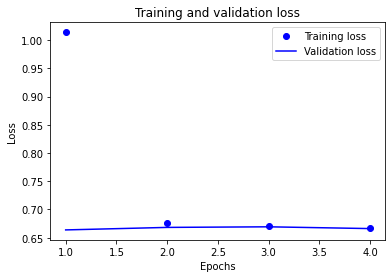

In [28]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
history_dict

{'accuracy': [0.57857144, 0.60452384, 0.62404764, 0.62404764],
 'loss': [1.0139633764823277,
  0.6755127012729645,
  0.6703494936227798,
  0.6666945914427439],
 'val_accuracy': [0.6239285469055176,
  0.6239285469055176,
  0.6239285469055176,
  0.6239285469055176],
 'val_loss': [0.6637579575181007,
  0.6682095815028463,
  0.6692597748977798,
  0.6661173030734062]}

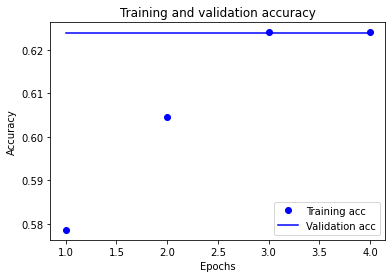

In [30]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Seq2Seq Model

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [32]:
df['tweets'].values

array(['nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life .',
       'haan yaar neha pensive_face pensive_face kab karega woh post loudly_crying_face usne na sach mein photoshoot karna chahiye phir woh post karega .',
       'television media congress ke liye nhi h . ye toh aapko pata chal hi gya hoga . achha hoga ki congress ke .',
       ...,
       'rt aap logo ki baat nahi kar raha najim bhai media walo ki kar raha hu jo bina janche parkhe one sided news .',
       '__ jay jay shree ram ram rajye aaya he danavo rakshasho chudelno or surpankha ke gharoke sa .',
       'mujhe to bhayankar ho gaya hai slightly_smiling_face shayad ab mai sahi aur galat bhi samajhna nahi chahta . mujhe kisi .'],
      dtype=object)

In [33]:
test_tweets=np.array(test_tweets)

In [34]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')

In [35]:
df['tweets'].values    

array(['nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life .',
       'haan yaar neha pensive_face pensive_face kab karega woh post loudly_crying_face usne na sach mein photoshoot karna chahiye phir woh post karega .',
       'television media congress ke liye nhi h . ye toh aapko pata chal hi gya hoga . achha hoga ki congress ke .',
       ...,
       'rt aap logo ki baat nahi kar raha najim bhai media walo ki kar raha hu jo bina janche parkhe one sided news .',
       '__ jay jay shree ram ram rajye aaya he danavo rakshasho chudelno or surpankha ke gharoke sa .',
       'mujhe to bhayankar ho gaya hai slightly_smiling_face shayad ab mai sahi aur galat bhi samajhna nahi chahta . mujhe kisi .'],
      dtype=object)

In [36]:
for i in test_tweets:
  clean_text(i)

In [37]:
frames = [df['tweets'],pd.DataFrame(test_tweets)]
result = pd.concat(frames,axis=1)

In [38]:
X=np.hstack((df['tweets'].values,test_tweets))

In [39]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

In [40]:
X.shape

(17000, 116)

In [41]:
testtweets=X[14000:,:]

In [42]:
len(testtweets)

3000

In [43]:
X=X[:14000,:]

In [44]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 116, 128)          256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 116, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9380, 116) (9380, 3)
(4620, 116) (4620, 3)


In [46]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 4, batch_size=batch_size, verbose = 2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/4
 - 68s - loss: 0.9452 - accuracy: 0.5286
Epoch 2/4
 - 67s - loss: 0.8315 - accuracy: 0.6204
Epoch 3/4
 - 67s - loss: 0.7712 - accuracy: 0.6541
Epoch 4/4
 - 67s - loss: 0.7211 - accuracy: 0.6892


In [47]:
output=[]
for x in range(len(testtweets)):
    result = model.predict(testtweets[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    output.append(np.argmax(result))

In [48]:
import sklearn.metrics

In [50]:
sklearn.metrics.accuracy_score(testlabels['Sentiment'],output)*100

63.43333333333333

# BERT Model

In [51]:
import tensorflow as tf
import torch
device_name = tf.test.gpu_device_name()
print(device_name)
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')
    import torch
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

!pip install transformers
from transformers import BertTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/device:GPU:0
Found GPU at: /device:GPU:0
There are 1 GPU(s) available.
     |████████████████████████████████| 778kB 8.5MB/s 
     |████████████████████████████████| 890kB 52.0MB/s 
     |████████████████████████████████| 3.0MB 315kB/s 
     |████████████████████████████████| 1.1MB 37.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=f8275994eff3697c212f997b50aeabf210e05b89e6a1f45827fc885aed680d17
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
Loading BERT tokenizer...


In [52]:
labels = df['sentiment']
sentences=df['tweets']

In [53]:
!pip install transformers

In [54]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [54]:
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

In [55]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  213


In [56]:
input_ids = []
attention_masks = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                        sent,        
                        truncation=True,              # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 128,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
label = torch.tensor(labels)
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life .
Token IDs: tensor([  101, 11265,  2078,  1037, 25292,  2102,  8945,  4244,  2102,  1058,
         2480, 23125, 15488, 10421,  2243,  1062,  8585,  2243,  9808,  3286,
         1041,  2439,  2022,  2480, 25389,  1041,  1046,  1037, 17823,  5643,
         2278, 15419,  1047, 21273,  2004,  2072, 27006,  7317,  2063,  1058,
        22571,  4215,  1037,  1049,  1057,  1046,  2166,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
        

In [57]:
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,       
                        truncation=True,               # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',
                             # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  nen á vist bolest vztek smutek zmatek osam ě lost beznad ě j a nakonec jen klid asi takhle vypad á m ů j life .
Token IDs: tensor([  101, 11265,  2078,  1037, 25292,  2102,  8945,  4244,  2102,  1058,
         2480, 23125, 15488, 10421,  2243,  1062,  8585,  2243,  9808,  3286,
         1041,  2439,  2022,  2480, 25389,  1041,  1046,  1037, 17823,  5643,
         2278, 15419,  1047, 21273,  2004,  2072, 27006,  7317,  2063,  1058,
        22571,  4215,  1037,  1049,  1057,  1046,  2166,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [58]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

12,600 training samples
1,400 validation samples


In [59]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
print(len(train_dataloader),len(validation_dataloader))

394 44


In [60]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    
)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [61]:
optimizer = AdamW(model.parameters(),lr = 3e-5)

In [62]:
from transformers import get_linear_schedule_with_warmup
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [63]:
import numpy.random as random
seed_val=10
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [64]:
def get_label(preds):
  pred_flat = np.argmax(preds, axis=1).flatten()
  return pred_flat 
def get_accuracy(y_true,y_pred):
   return (min(f1_score(y_true, y_pred, average='macro'),f1_score(y_true, y_pred, average='micro')))

In [65]:
import time
from sklearn.metrics import f1_score
training_stat=[]
for epoch in range(0,2):
  print("-----Running the {} epoch-------".format(epoch))
  t0 = time.time()
  train_loss=0
  model.train()
  for step,batch in enumerate(train_dataloader):
    
    b_input=batch[0].to('cuda')
    b_input_mask=batch[1].to('cuda')
    y=batch[2].to('cuda')

    model.zero_grad()

    loss,output=model(b_input,
                      attention_mask=b_input_mask,
                      labels=y,
                      token_type_ids=None        
    )
    train_loss+=loss.item()
    loss.backward()
    optimizer.step()
    scheduler.step()
  avg_train_loss=train_loss/len(train_dataloader)
  print("Loss For This Epoch is {}".format(avg_train_loss))
  model.eval()
  val_loss=0
  val_accuracy=0

  for batch in validation_dataloader:
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)
    with torch.no_grad():        
      (loss, logits) = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask,
                            labels=b_labels)
    val_loss += loss.item()
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    flag1=[];flag2=[]
    for i in label_ids:
      flag1.append(i)
    z=get_label(logits)
    for i in z:
      flag2.append(i)  
    temp2 = (time.time()-t0)
  result=get_accuracy(flag1,flag2)
  print("-----Running the {} epoch. Time Taken is{}-------".format(epoch,temp2))
  print('---- Accuracy for this Epoch is {}'.format(result))

-----Running the 0 epoch-------
Loss For This Epoch is 0.8960106918957028
-----Running the 0 epoch. Time Taken is159.41740655899048-------
---- Accuracy for this Epoch is 0.4444444444444445
-----Running the 1 epoch-------
Loss For This Epoch is 0.7534620096235711
-----Running the 1 epoch. Time Taken is157.72832608222961-------
---- Accuracy for this Epoch is 0.5773993808049536


In [68]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset, random_split

sentences = test_tweets

input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
                         sent,   
                        truncation=True,
                                          # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

batch_size = 1

prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [69]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
model.eval()

predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  
  b_input_ids, b_input_mask = batch
  
  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  #label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  #true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 3,000 test sentences...
    DONE.


In [70]:
pred_labels_i=[]

In [71]:
for i in range(len(input_ids)):
  pred_labels_i.append(np.argmax(predictions[i], axis=1).flatten()[0])

In [72]:
import sklearn

In [73]:
f1_score(testlabels['Sentiment'], pred_labels_i, average="weighted")*100

70.00648014848848